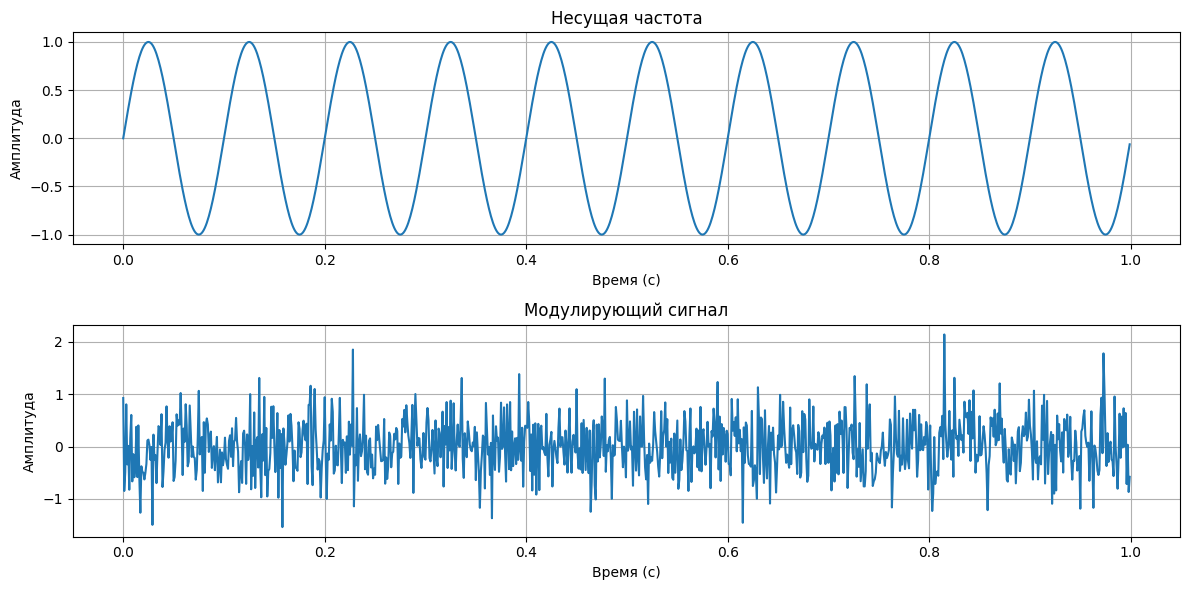

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Параметры сигнала
Fs = 1000  # Частота дискретизации (Гц)
T = 1      # Длительность сигнала (секунды)
N = Fs*T   # Количество отсчётов

# Временная ось
t = np.linspace(0, T, N, endpoint=False)

# Основная частота и амплитуда
f0 = 10    # Основная частота (Гц)
A0 = 1     # Основная амплитуда

# Создание сигнала с несколькими гармониками
signal = A0 * np.sin(2*np.pi*f0*t)

# Создание модулирующего сигнала похожего на запись радиопереговоров
modulating_signal = np.random.normal(loc=0, scale=0.5, size=N)

# Создание несущего сигнала (простая синусоида)
carrier_signal = np.sin(2 * np.pi * f0 * t)

# Визуализация несущей частоты и модулирующего сигнала
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, carrier_signal)
plt.title('Несущая частота')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, modulating_signal)
plt.title('Модулирующий сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.tight_layout()
plt.show()

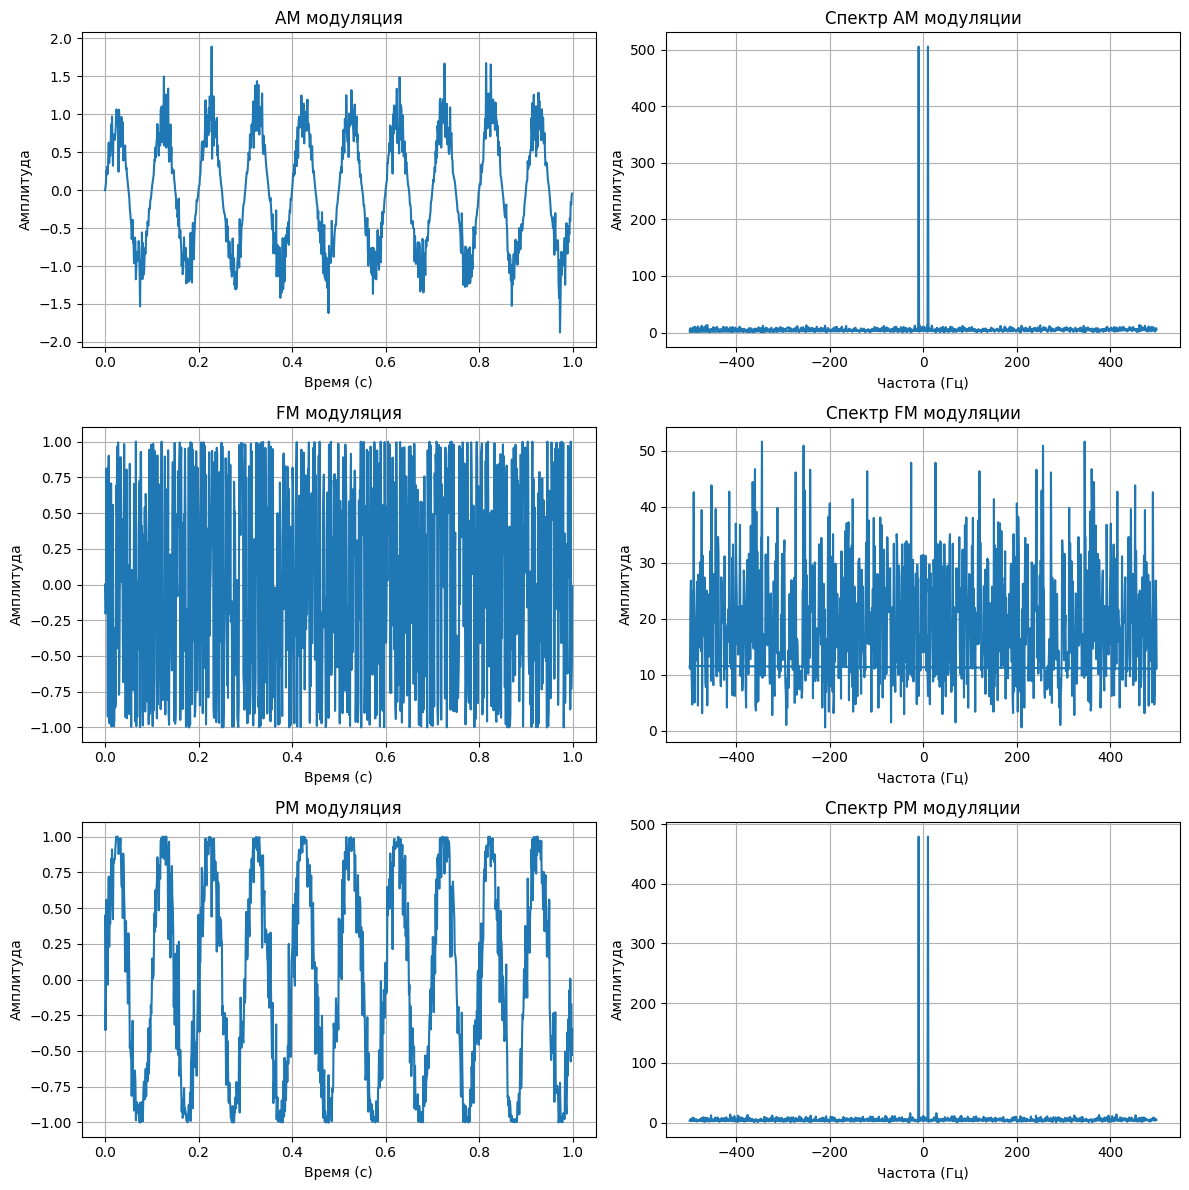

In [ ]:
# Амплитудная модуляция (AM)
am_modulated_signal = (1 + 0.5 * modulating_signal) * carrier_signal

# Частотная модуляция (FM)
fm_modulated_signal = np.sin(2 * np.pi * (f0 + 50 * modulating_signal) * t)

# Фазовая модуляция (PM)
pm_modulated_signal = np.sin(2 * np.pi * f0 * t + 0.5 * modulating_signal)

# Вычисление спектра для каждого модулированного сигнала
am_freq, am_amp = fft(am_modulated_signal), fftfreq(N, 1/Fs)
fm_freq, fm_amp = fft(fm_modulated_signal), fftfreq(N, 1/Fs)
pm_freq, pm_amp = fft(pm_modulated_signal), fftfreq(N, 1/Fs)

# Визуализация модулированных сигналов и их спектров
plt.figure(figsize=(12, 12))

# Графики амплитудной модуляции (AM) и ее спектра
plt.subplot(3, 2, 1)
plt.plot(t, am_modulated_signal)
plt.title('AM модуляция')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(am_amp, np.abs(am_freq))
plt.title('Спектр AM модуляции')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)

# Графики частотной модуляции (FM) и ее спектра
plt.subplot(3, 2, 3)
plt.plot(t, fm_modulated_signal)
plt.title('FM модуляция')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(fm_amp, np.abs(fm_freq))
plt.title('Спектр FM модуляции')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)

# Графики фазовой модуляции (PM) и ее спектра
plt.subplot(3, 2, 5)
plt.plot(t, pm_modulated_signal)
plt.title('PM модуляция')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.subplot(3, 2, 6)
plt.plot(pm_amp, np.abs(pm_freq))
plt.title('Спектр PM модуляции')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.tight_layout()
plt.show()

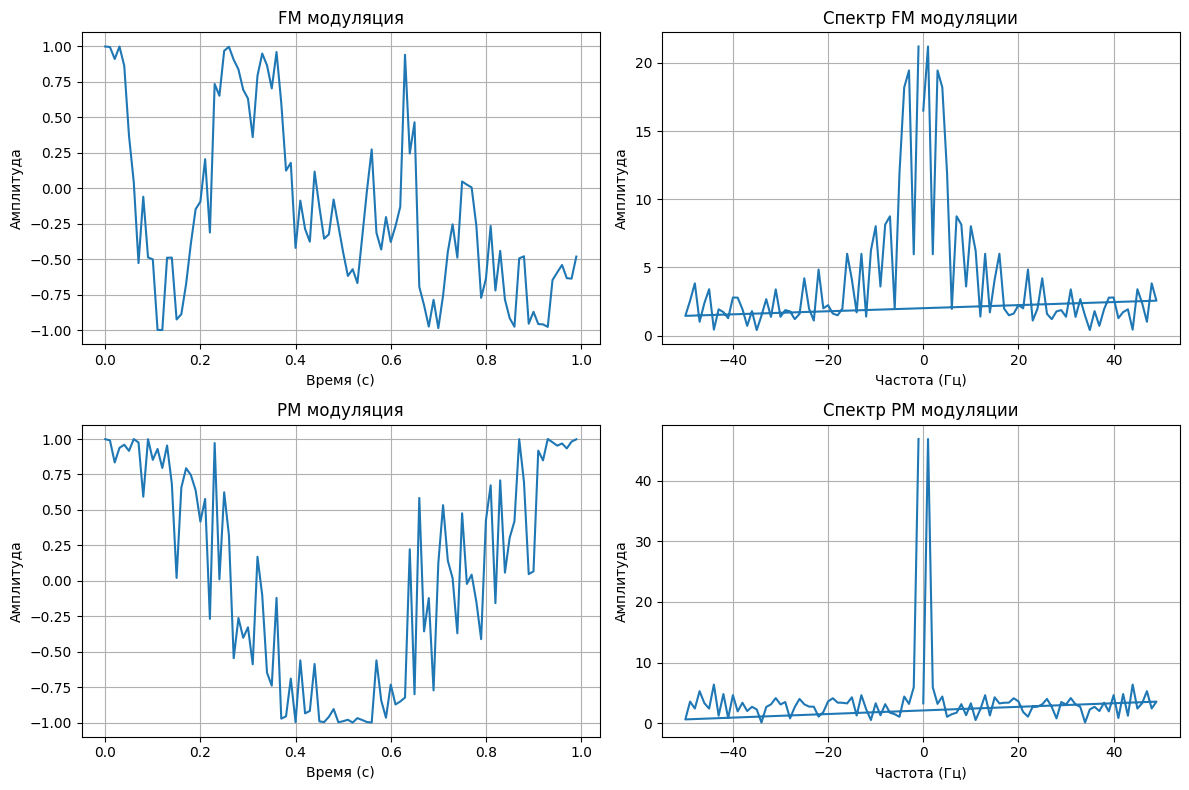

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Параметры сигнала
Fs = 100  # Частота дискретизации (Гц)
T = 1      # Длительность сигнала (секунды)
N = Fs*T   # Количество отсчётов

# Временная ось
t = np.linspace(0, T, N, endpoint=False)

# Создание модулирующего сигнала
modulating_signal = np.random.normal(loc=0, scale=0.5, size=N)

# Создание несущего сигнала (простая синусоида)
carrier_signal = np.sin(2 * np.pi * 50 * t)

# Функция для частотной модуляции (FM)
def fm_modulation(carrier_signal, modulating_signal, fc, kf, t):
    return np.cos(2 * np.pi * fc * t + kf * np.cumsum(modulating_signal))

# Функция для фазовой модуляции (PM)
def pm_modulation(carrier_signal, modulating_signal, fc, kp, t):
    return np.cos(2 * np.pi * fc * t + kp * modulating_signal)

# Коэффициенты модуляции
kf = 1  # для частотной модуляции
kp = 1   # для фазовой модуляции

# Модулированные сигналы
fm_modulated_signal = fm_modulation(carrier_signal, modulating_signal, 1, kf, t)
pm_modulated_signal = pm_modulation(carrier_signal, modulating_signal, 1, kp, t)

# Вычисление спектров для модулированных сигналов
fm_freq, fm_amp = fft(fm_modulated_signal), fftfreq(N, 1/Fs)
pm_freq, pm_amp = fft(pm_modulated_signal), fftfreq(N, 1/Fs)

# Визуализация модулированных сигналов и их спектров
plt.figure(figsize=(12, 8))

# Графики частотной модуляции (FM) и ее спектра
plt.subplot(2, 2, 1)
plt.plot(t, fm_modulated_signal)
plt.title('FM модуляция')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(fm_amp, np.abs(fm_freq))
plt.title('Спектр FM модуляции')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)

# Графики фазовой модуляции (PM) и ее спектра
plt.subplot(2, 2, 3)
plt.plot(t, pm_modulated_signal)
plt.title('PM модуляция')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(pm_amp, np.abs(pm_freq))
plt.title('Спектр PM модуляции')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.tight_layout()
plt.show()


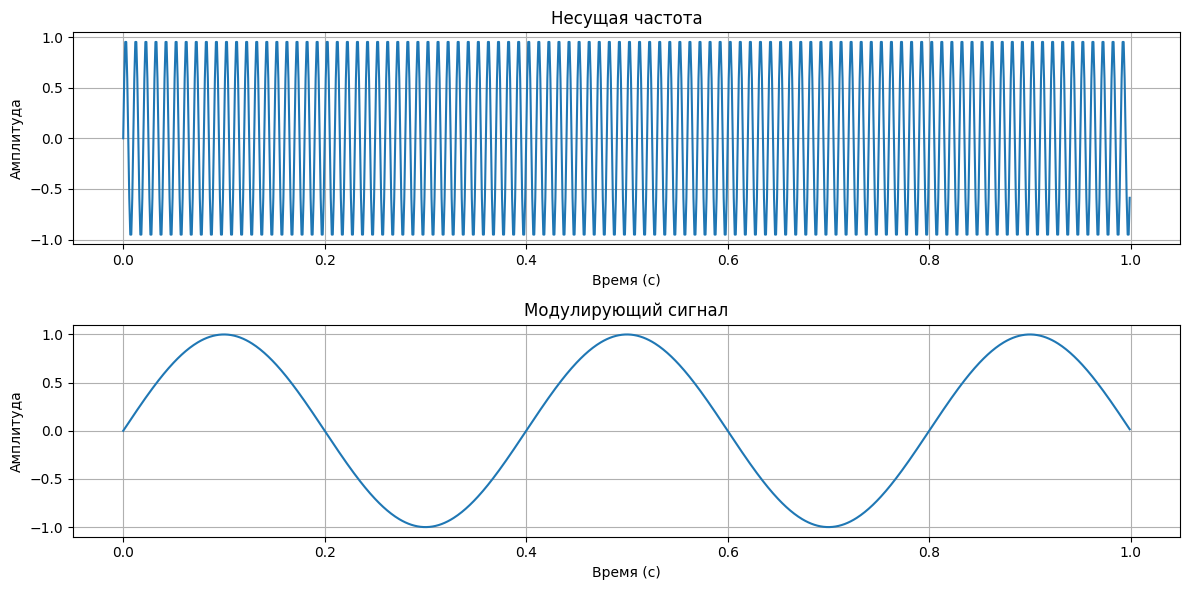

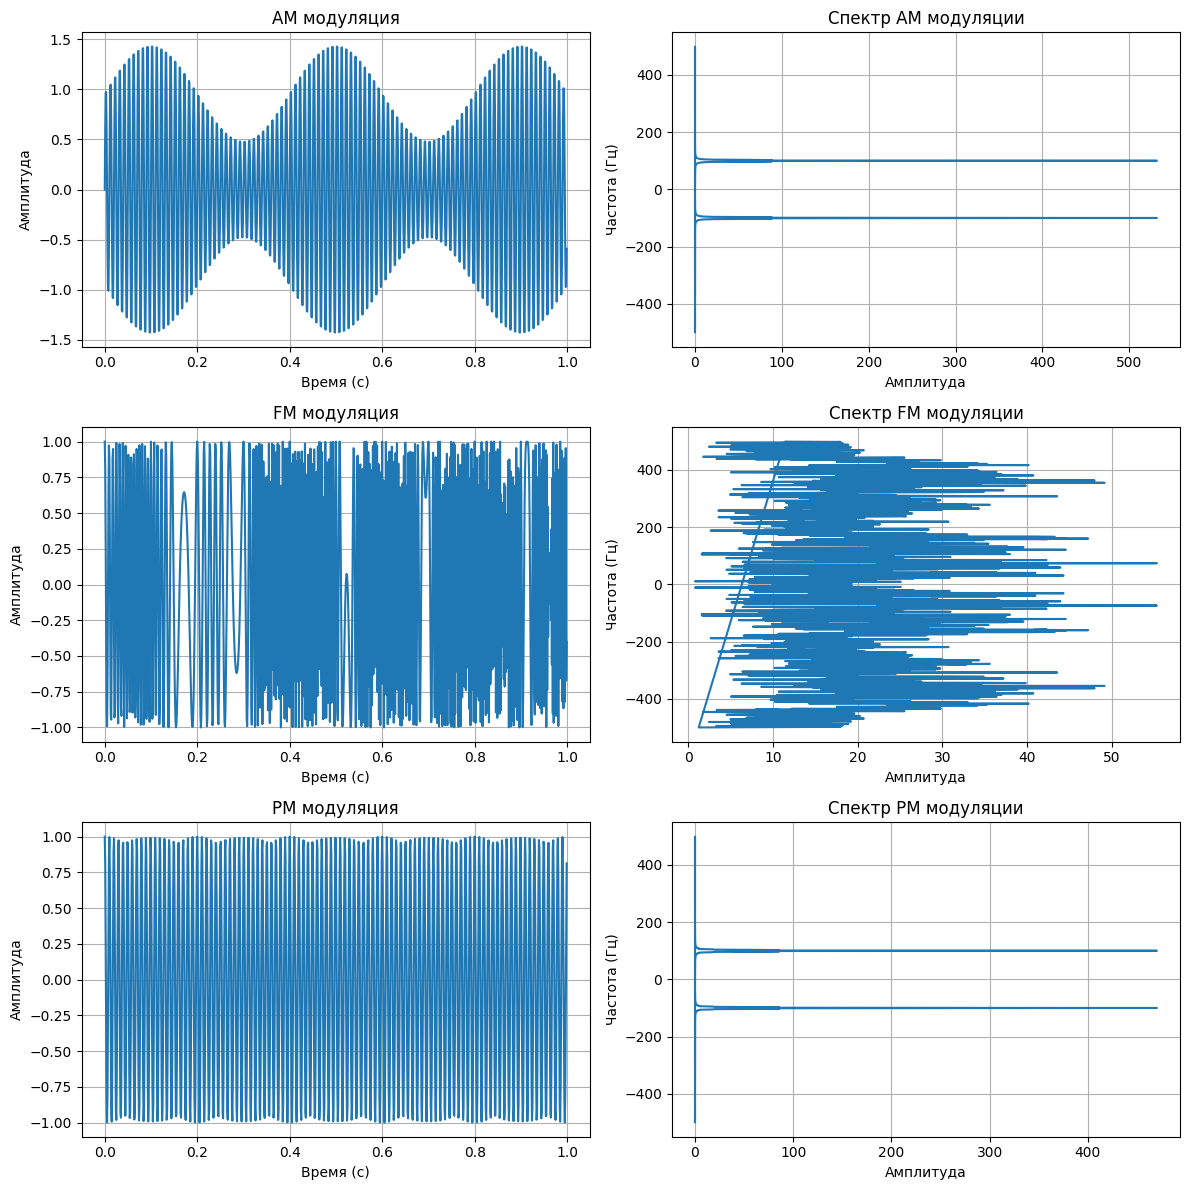

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Параметры сигнала
Fs = 1000  # Частота дискретизации (Гц)
T = 1      # Длительность сигнала (секунды)
N = Fs*T   # Количество отсчётов

# Временная ось
t = np.linspace(0, T, N, endpoint=False)

# Основная частота и амплитуда
f0 = 100    # Основная частота (Гц)
A0 = 1     # Основная амплитуда

# Создание сигнала с несколькими гармониками
signal = A0 * np.sin(2*np.pi*f0*t)

# Создание модулирующего сигнала похожего на запись радиопереговоров
modulating_signal = A0 * np.sin(2*np.pi*f0*t*0.025)

# Создание несущего сигнала (простая синусоида)
carrier_signal = np.sin(2 * np.pi * f0 * t)

# Визуализация несущей частоты и модулирующего сигнала
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, carrier_signal)
plt.title('Несущая частота')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, modulating_signal)
plt.title('Модулирующий сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.tight_layout()
plt.show()

# Амплитудная модуляция (AM)
am_modulated_signal = (1 + 0.5 * modulating_signal) * carrier_signal

# Частотная модуляция (FM)
kf = 50  # Коэффициент модуляции для FM
fm_modulated_signal = np.cos(2 * np.pi * (f0 + kf * modulating_signal) * t)

# Фазовая модуляция (PM)
kp = 0.5  # Коэффициент модуляции для PM
pm_modulated_signal = np.cos(2 * np.pi * f0 * t + kp * modulating_signal)

# Вычисление спектра для каждого модулированного сигнала
am_freq, am_amp = fft(am_modulated_signal), fftfreq(N, 1/Fs)
fm_freq, fm_amp = fft(fm_modulated_signal), fftfreq(N, 1/Fs)
pm_freq, pm_amp = fft(pm_modulated_signal), fftfreq(N, 1/Fs)

# Визуализация модулированных сигналов и их спектров
plt.figure(figsize=(12, 12))

# Графики амплитудной модуляции (AM) и ее спектра
plt.subplot(3, 2, 1)
plt.plot(t, am_modulated_signal)
plt.title('AM модуляция')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(np.abs(am_freq), am_amp)
plt.title('Спектр AM модуляции')
plt.xlabel('Амплитуда')
plt.ylabel('Частота (Гц)')
plt.grid(True)

# Графики частотной модуляции (FM) и ее спектра
plt.subplot(3, 2, 3)
plt.plot(t, fm_modulated_signal)
plt.title('FM модуляция')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(np.abs(fm_freq), fm_amp)
plt.title('Спектр FM модуляции')
plt.xlabel('Амплитуда')
plt.ylabel('Частота (Гц)')
plt.grid(True)

# Графики фазовой модуляции (PM) и ее спектра
plt.subplot(3, 2, 5)
plt.plot(t, pm_modulated_signal)
plt.title('PM модуляция')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.subplot(3, 2, 6)
plt.plot(np.abs(pm_freq), pm_amp)
plt.title('Спектр PM модуляции')
plt.xlabel('Амплитуда')
plt.ylabel('Частота (Гц)')
plt.grid(True)

plt.tight_layout()
plt.show()
